In [1]:
# python program to read in Australian Tourist Bureau Aggregate Consumption Data for 2006-2007, 2017-2018

In [2]:
# resource libraries needed for data manipulation and visualization with plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


In [3]:
# create file pointer for data file created from Austrailian Excel data
TourCons_fp = "Resources/consumptiondata_aus.csv"

In [4]:
# create file pointer for air and water daily max temperature data from Davies Reef, right in the middle of the GBR
AirWaterTempMax_fp = "Resources/DaviesReefAirWaterTempMax.csv"

In [5]:
# read in data and store in data frame
TourCons_df = pd.read_csv(TourCons_fp, encoding='ISO-8859-1')
TourCons_df

,Reporting Period,TNQ,NSW,VIC,QNS
0,200607,3479,24197,15808,20131
1,200708,3502,25070,16771,21350
2,200809,3413,25295,17561,20888
3,200910,3208,25897,17993,20534
4,201011,3107,27548,18931,20389
5,201112,3579,27434,19680,22933
6,201213,3479,29150,20618,24248
7,201314,3569,30629,21440,23819
8,201415,3626,31495,22466,23969
9,201516,4125,33126,24172,25637


In [6]:
# read in data and store in data frame
AirWaterTempMax_df = pd.read_csv(AirWaterTempMax_fp, encoding='ISO-8859-1')
AirWaterTempMax_df.head()

,date,AirTempMax,WaterTempMax
0,20060101,28.333,28.446
1,20060102,28.308,28.571
2,20060103,28.045,28.483
3,20060104,28.245,28.646
4,20060105,28.521,28.846


In [7]:
# let's setup the x axis as  column names of the data frame 
x_axis = ['2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17','2017-18']

In [8]:
# create data series from the data frame columns
TNQ = TourCons_df['TNQ']
NSW = TourCons_df['NSW']
VIC = TourCons_df['VIC']
QNS = TourCons_df['QNS']

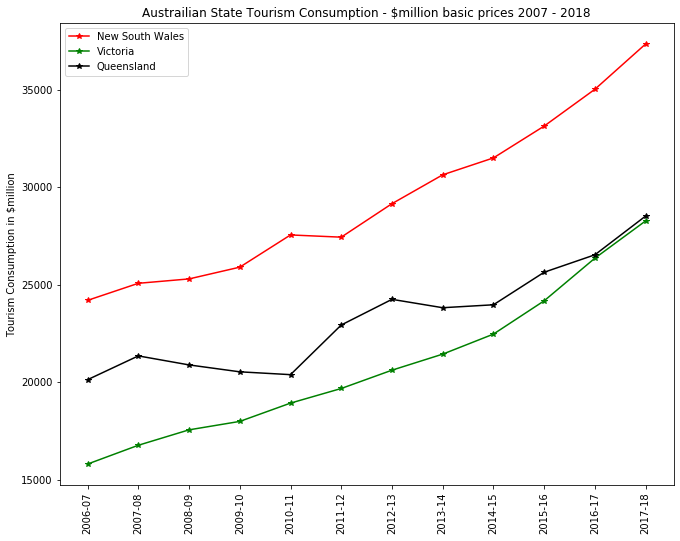

In [9]:
# create handles for line plot for each australian state except tropical north queensland due to scale of spending
# set the figure size to 8.5 x 11 this is in inches for portrait, 11 x 8.5 for landscape
plt.figure(figsize=[11,8.5])

# set up the data for the plot
NSW_handle, = plt.plot(x_axis, NSW, marker ='*', color='red', label= "New South Wales")
VIC_handle, = plt.plot(x_axis, VIC, marker ='*', color='green', label= "Victoria")
QNS_handle, = plt.plot(x_axis, QNS, marker ='*', color='black', label="Queensland")
# set the text for the y axis
plt.ylabel("Tourism Consumption in $million")
# Set the title for the graph
plt.title("Austrailian State Tourism Consumption - $million basic prices 2007 - 2018")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# save tbe plot 
plt.savefig("Output/SavedPlots/Aus_state_totalconsmptn_lnd.png")

# show the plot
plt.show()

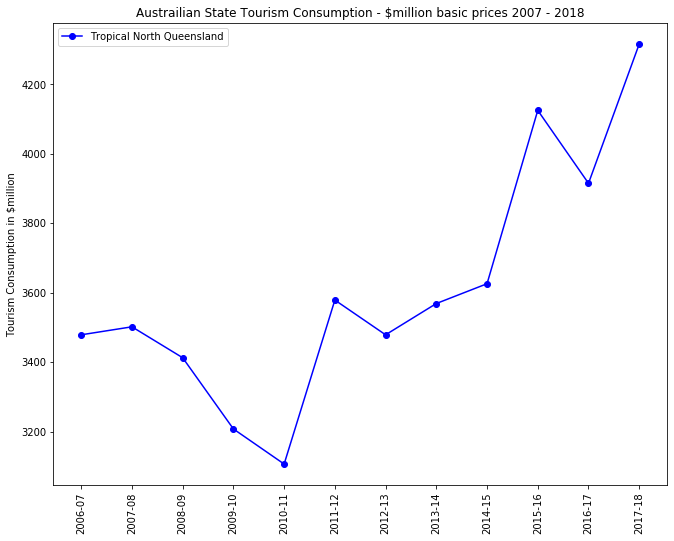

In [10]:
# set the figure size to 8.5 x 11 this is in inches, invert for landscape
plt.figure(figsize=[11,8.5])

# create and plot Tropical North Queensland
TNQ_handle, = plt.plot(x_axis, TNQ, marker ='o', color='blue', label="Tropical North Queensland")
# set the text for the y axis
plt.ylabel("Tourism Consumption in $million")
# Set the title for the graph
plt.title("Austrailian State Tourism Consumption - $million basic prices 2007 - 2018")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# save the plot 
plt.savefig("Output/SavedPlots/TropNorthQueenslnd_state_totalconsmptn_lnd.png")
# show the plot
plt.show()

In [11]:
#dropping not available data
AirWaterTempMax_df = AirWaterTempMax_df.dropna(how = 'any')
#AirWaterTempMax_df.shape

In [12]:
x_axis = AirWaterTempMax_df['date']

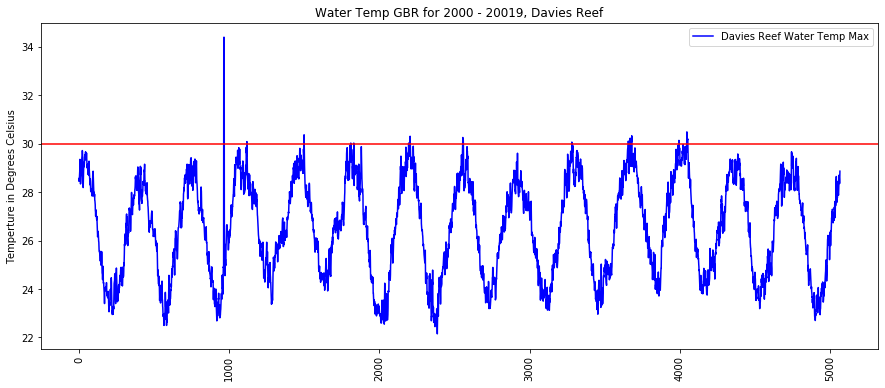

In [13]:
# set the figure size to 8.5 x 11 this is in inches
plt.figure(figsize=[15,6])

# set the data up for plotting
plt.plot(AirWaterTempMax_df['WaterTempMax'], color='blue', label="Davies Reef Water Temp Max")
# set the text for the y axis
plt.ylabel("Temperture in Degrees Celsius")
# Set the title for the graph
plt.title("Water Temp GBR for 2000 - 20019, Davies Reef")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# draw a horizontal line at the y value of 29 C
plt.axhline(y=30, color='r', linestyle='-')
# save the plot to a file 
# plt.savefig("Output/SavedPlots/DaviesReef_WaterTempMax.png")
# show the plot
plt.show()

In [14]:
# Let's look at a subset of the data, for the timer period 20150101 to the end of the data set

In [15]:
WaterTempMax_subset_df = AirWaterTempMax_df.loc[(AirWaterTempMax_df['date'] >= 20150101) & (AirWaterTempMax_df['date'] <= 20191231)]

In [16]:
x_axis = WaterTempMax_subset_df['date']

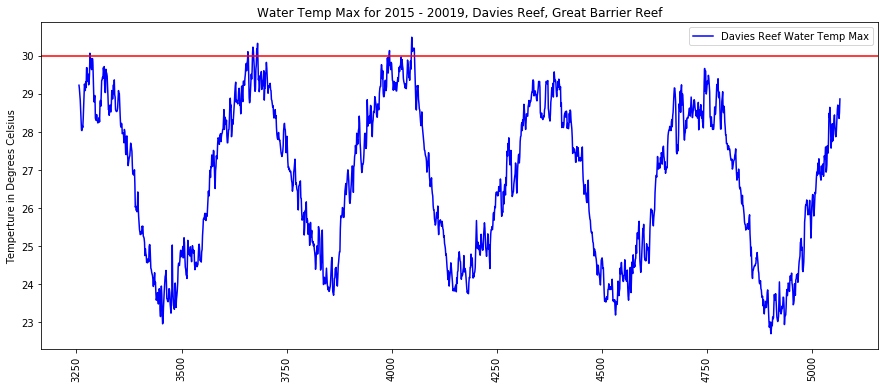

In [17]:
# set the figure size to 8.5 x 11 this is in inches
plt.figure(figsize=[15,6])

# set the data up for plotting 
# let's look at the max water temp, corals need temp between 18 and 29 C for good health
plt.plot(WaterTempMax_subset_df['WaterTempMax'], color='blue', label="Davies Reef Water Temp Max")
# set the text for the y axis
plt.ylabel("Temperture in Degrees Celsius")
# Set the title for the graph
plt.title("Water Temp Max for 2015 - 20019, Davies Reef, Great Barrier Reef")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# draw a horizontal line at the y value of 30.5 C
plt.axhline(y=30, color='r', linestyle='-')
# plt.ylim(27,31)
# save the plot 
# plt.savefig("Output/SavedPlots/DaviesReef_WaterTempMax_2015_2019.png")

# show the plot
plt.show()

In [18]:
# let's obtain the means for each year and then plot against the Trop North Queensland consumption data

In [19]:
# create 12 data frames to hold monthly data, then we can obtain a single value, then piece the monthly data back to together
WaterTempMax_ByYear_df = pd.DataFrame()


In [20]:
# create new data frames so we can calculate annual mean by selecting the rows of interest via the loc function
WaterTempMax_ByYear_df = AirWaterTempMax_df

In [21]:
# we'll need to create a new field based on the first 4 characters of the data field, then we can group by year

In [22]:
# let's subset the data before we create the year variable
WaterTempMax_ByYear_df = WaterTempMax_ByYear_df.loc[(WaterTempMax_ByYear_df['date'] >= 20070101) & (WaterTempMax_ByYear_df['date'] <= 20181231)]

In [23]:
WaterTempMax_ByYear_df['year'] = WaterTempMax_ByYear_df['date'].astype(str).str.slice(0,4)

/Users/Shared/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
WaterTempMax_ByYrSort_df = pd.DataFrame()

In [25]:
# let's get the data in sorted order first, then we can calculate the means easier
WaterTempMax_ByYrSort_df = WaterTempMax_ByYear_df.sort_values('year', ascending='True')

In [26]:
# Now we can group by year and get our mean water temp values
WaterTempMax_GrpByYr_df = WaterTempMax_ByYrSort_df.groupby('year')

In [27]:
WaterTempMaxByYearMax = WaterTempMax_GrpByYr_df['WaterTempMax'].max()

In [28]:
# let's setup the x axis as  column names of the data frame 
Years = ['2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17','2017-18']

In [29]:
WaterTempMaxByYearMax.reset_index()

,year,WaterTempMax
0,2007,29.147
1,2008,34.380
2,2009,30.080
3,2010,30.360
4,2011,30.020
5,2012,30.300
6,2013,30.250
7,2014,29.600
8,2015,30.060
9,2016,30.320


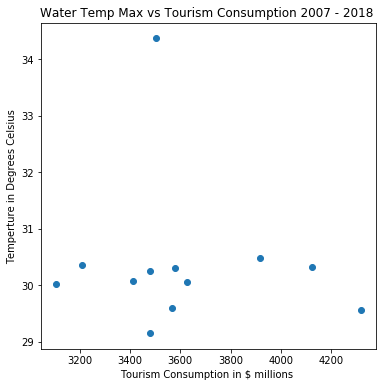

In [30]:
# set the figure size to 8.5 x 11 this is in inches
plt.figure(figsize=[6,6])
#plt.annotate(str=WaterTempMaxByYearMax['year'].astype(str))

# set the data up for plotting this is a scatter
# let's look at the max water temp, corals need temp between 18 and 29 C for good health
plt.scatter(TNQ,WaterTempMaxByYearMax)
# set the text for the y axis
plt.xlabel("Tourism Consumption in $ millions ")
plt.ylabel("Temperture in Degrees Celsius")
# Set the title for the graph
plt.title("Water Temp Max vs Tourism Consumption 2007 - 2018 ")
# place the legend in the lower right
# plt.legend(loc="best")
# save the plot to a file in the current folder
plt.savefig("Output/SavedPlots/TourismCons_WaterTempMax_ScatterPlot.png")

# rotate the labels
# show the plot
plt.show()

In [31]:
# let's show the trend in max water temp using monthly data
WaterTempMax_ByYrMnth_df = pd.DataFrame()

In [32]:
# grab the data of interest - let us use the subset first
WaterTempMax_ByYearMnth_df = WaterTempMax_subset_df

In [33]:
# Create a new column to hold the yearmonth value first 6 chars of data column
WaterTempMax_ByYearMnth_df['year_month'] = WaterTempMax_ByYearMnth_df['date'].astype(str).str.slice(0,6)

/Users/Shared/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
WaterTempMax_ByYearMnth_df

,date,AirTempMax,WaterTempMax,year_month
3256,20150101,28.9,29.22,201501
3257,20150102,28.3,29.12,201501
3258,20150103,28.8,28.96,201501
3259,20150104,28.6,28.82,201501
3260,20150105,28.4,28.56,201501
...,...,...,...,...
5063,20191227,27.2,28.54,201912
5064,20191228,26.7,28.45,201912
5065,20191229,27.1,28.35,201912
5066,20191230,27.0,28.51,201912


In [35]:
# Now we can group by year and get our mean water temp values
WaterTempMax_GrpByYearMnth_df = WaterTempMax_ByYearMnth_df.groupby('year_month')

In [36]:
# now find the monthly max, min and median for water temp needed for box plots by month
WaterTempMaxByYearMnthMax = WaterTempMax_GrpByYearMnth_df['WaterTempMax'].max()
WaterTempMinByYearMnthMax = WaterTempMax_GrpByYearMnth_df['WaterTempMax'].min()
WaterTempMedianByYearMnthMax = WaterTempMax_GrpByYearMnth_df['WaterTempMax'].median()

In [37]:
WaterTempMax_ByYearMnth_df

,date,AirTempMax,WaterTempMax,year_month
3256,20150101,28.9,29.22,201501
3257,20150102,28.3,29.12,201501
3258,20150103,28.8,28.96,201501
3259,20150104,28.6,28.82,201501
3260,20150105,28.4,28.56,201501
...,...,...,...,...
5063,20191227,27.2,28.54,201912
5064,20191228,26.7,28.45,201912
5065,20191229,27.1,28.35,201912
5066,20191230,27.0,28.51,201912


In [38]:
WaterTempMax_GrpByYearMnth_df

In [39]:
# set the x axis to the date/month column
x_axis = WaterTempMax_ByYearMnth_df['year_month'].unique().astype(str)

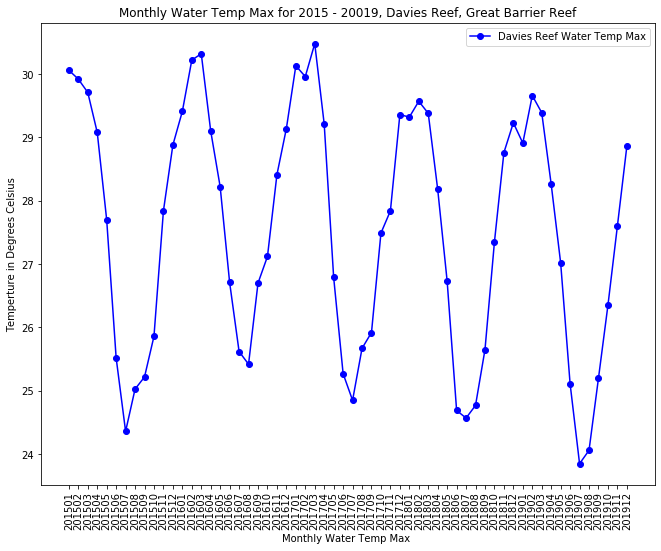

In [40]:
# plot the data
# set the figure size to 8.5 x 11 this is in inches
plt.figure(figsize=[11, 8.5])

# set the data up for plotting 
# let's look at the max water temp, corals need temp between 18 and 29 C for good health
WaterTempMnth_handle, = plt.plot(x_axis, WaterTempMaxByYearMnthMax, marker ='o', color='blue', label="Davies Reef Water Temp Max")
# set the text for the y axis
plt.ylabel("Temperture in Degrees Celsius")
plt.xlabel("Monthly Water Temp Max ")
# Set the title for the graph
plt.title("Monthly Water Temp Max for 2015 - 20019, Davies Reef, Great Barrier Reef")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)

# save the plot to a file in the current folder
plt.savefig("Output/SavedPlots/MonthlyDaviesReef_WaterTempMax_2015_2019.png")

# show the plot
plt.show()
